In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
import numpy as np
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
from sklearn.model_selection import train_test_split
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('owid-covid-data.csv',encoding= 'unicode_escape' )

In [3]:
df = df[df['location'].str.contains('Thailand')]
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139794,THA,Asia,Thailand,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139795,THA,Asia,Thailand,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139796,THA,Asia,Thailand,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139797,THA,Asia,Thailand,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139798,THA,Asia,Thailand,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN


In [4]:
df = df[['location', 'date', 'new_cases']]

In [5]:
df.isnull().sum()

location      0
date          0
new_cases    19
dtype: int64

In [6]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df.index = (df.index - pd.to_datetime('1970-01-01')).days

In [7]:
df

,location,date,new_cases
date,,,
18265,Thailand,2020-01-04,NaN
18266,Thailand,2020-01-05,NaN
18267,Thailand,2020-01-06,NaN
18268,Thailand,2020-01-07,NaN
18269,Thailand,2020-01-08,NaN
...,...,...,...
19011,Thailand,2022-01-19,44447.0
19012,Thailand,2022-01-20,8640.0
19013,Thailand,2022-01-21,8112.0


In [8]:
df.fillna(0, inplace =True )

In [9]:
y = np.asarray(df['new_cases'])
X = np.asarray(df.index.values)

In [10]:
regression_model = LinearRegression()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
X_transform = poly.fit_transform(X.reshape(-1, 1))
#Fit the data(train the model)
regression_model.fit(X_transform, y.reshape(-1, 1))

LinearRegression()

In [12]:
# Prediction for historical dates. Let’s call it learned values.
y_learned = regression_model.predict(X_transform)

In [13]:
#Now, add future dates to the date index and pass that index to
#the regression model for future prediction.
#As we have converted date index into a range index, hence, here we
#just need to add 3650 days ( roughly 10 yrs)
#to the previous index. x gives the last value of the series.
newindex = np.asarray(pd.RangeIndex(start = 19015 , stop = 19015+150))

In [14]:
#Convert the extended dimension x in the higher degree polynomial expression
X_extended_transform = poly.fit_transform(newindex.reshape(-1, 1))
#Prediction for future dates. Let’s call it predicted values.
y_predict = regression_model.predict(X_extended_transform)
#Print the last predicted value

In [15]:
X = pd.to_datetime(df.index, origin='1970-01-01', unit='D')
future_x = pd.to_datetime(newindex, origin='1970-01-01', unit='D')

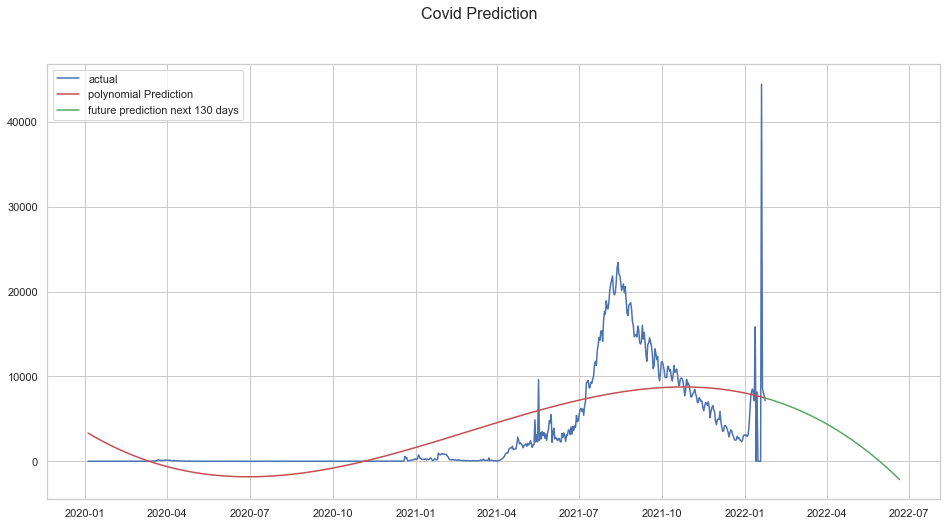

In [16]:
#Setting figure size
from matplotlib.pylab import rcParams
rcParams = 20,10
#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(X,df['new_cases'], label='actual')
#Plot the regression model
plt.plot(X,y_learned, color='r', label='polynomial Prediction')
#Plot the future predictions
plt.plot(future_x,y_predict, color='g', label='future prediction next 130 days')
#Set the title of the graph
plt.suptitle('Covid Prediction', fontsize=16)

plt.legend()
#display the graph
plt.show()

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [18]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

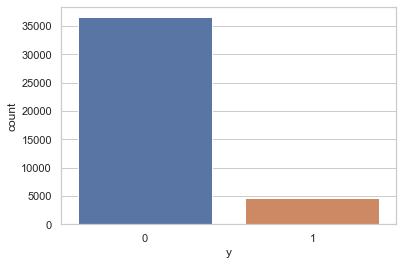

In [19]:
data['y'].value_counts()
sns.countplot(x = 'y', data=data)
plt.show()

In [20]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
percent_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print('Percentage of no subscription',percent_of_no_sub * 100)
percent_of_sub = count_sub/(count_no_sub+count_sub)
print('Percentage of subscription',percent_of_sub * 100)

Percentage of no subscription 88.73458288821988
Percentage of subscription 11.265417111780131


In [21]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [22]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [23]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [24]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


Text(0, 0.5, 'Frequency of Purcahse')

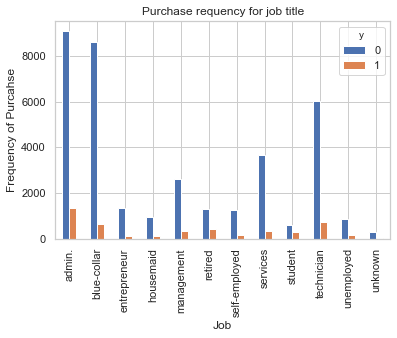

In [25]:
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('Purchase requency for job title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purcahse')


Text(0, 0.5, 'Proportion of Customer')

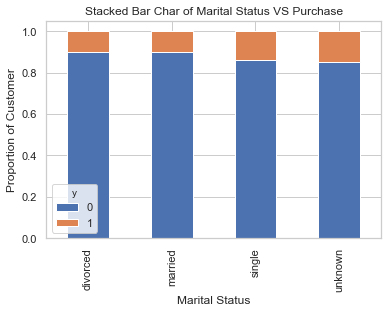

In [26]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked =True)
plt.title('Stacked Bar Char of Marital Status VS Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customer')

Text(0, 0.5, 'Purcahse')

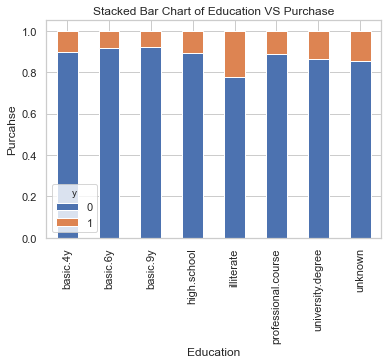

In [27]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis =0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education VS Purchase')
plt.xlabel('Education')
plt.ylabel('Purcahse')

Text(0, 0.5, 'Frequency of Purcahse')

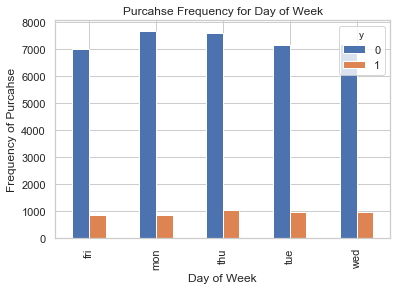

In [28]:
pd.crosstab(data.day_of_week, data.y).plot(kind='bar')
plt.title('Purcahse Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purcahse')

Text(0, 0.5, 'Frequency')

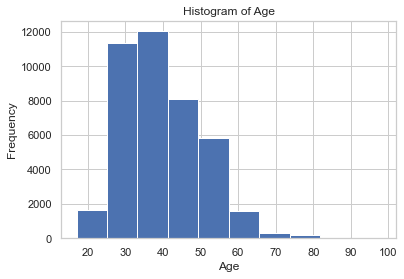

In [29]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency of Purchase')

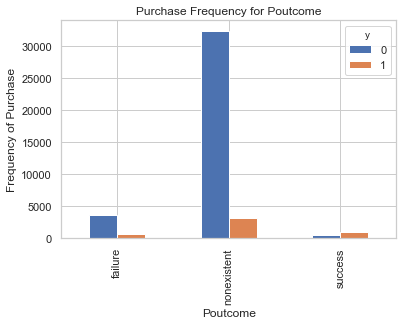

In [30]:
pd.crosstab(data.poutcome, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

In [31]:
cat_vars = ['job','marital','education','default','housing','loan','contact',
           'month','day_of_week','poutcome']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list, lsuffix='_left', rsuffix='_right')
    data = data1
    
cat_vars = ['job','marital','education','default','housing','loan','contact',
           'month','day_of_week','poutcome']
data_vars = data.columns.values.tolist()
to_keep = [ i for i in data_vars if i not in cat_vars]


In [32]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [33]:
#!pip install imblearn


In [34]:
#SMOTE
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE

In [36]:
os = SMOTE(random_state = 0)
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X , columns= columns)
os_data_y = pd.DataFrame(data=os_data_y, columns = ['y'])

print('length of oversampled is ', len(os_data_X))
print('Number of no subscription in oversampled data', len(os_data_y[os_data_y['y']==0]))
print('Number of subscription', len(os_data_y[os_data_y['y']==1]))
print('Proportion of no subscription in oversampled data', len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print('Proportion of subscription in oversampled data', len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription in oversampled data 0.5
Proportion of subscription in oversampled data 0.5


In [37]:
data_final_vars = data_final.columns.values.tolist()
y=['y']
X = [ i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [38]:
logreg = LogisticRegression()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=25)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True  True  True False  True  True  True  True  True
 False  True  True  True  True  True  True False  True False False False
 False False False False False False False  True  True  True  True  True
 False False False]
[37 31 30 36 29 23 26 35 17 32 12  5  7  6 11 33 10  9 16  8 14 13  1  1
  1  1  1  1  1  1 38  1  1  1  1  1 39  1  1  1  1  1  1  2  1 18 34 20
 22 24 28 15 19 21 25  1  1  1  1  1  4  3 27]


In [95]:
os_data_X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [350]:
cols=['euribor3m','education_basic.4y','education_basic.6y','marital_divorced','job_blue-collar','job_entrepreneur', 'job_housemaid',
       'education_basic.9y', 'education_high.school', 'contact_telephone', 'housing_no','housing_unknown','job_services','job_technician',
       'education_professional.course', 'education_university.degree','education_unknown','housing_yes', 'loan_yes', 'job_retired',
      'contact_cellular', 'month_apr', 'month_aug',  'month_jul', 'month_jun',
      'month_may', 'month_nov',  'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed','poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'] 
X=os_data_X[cols]
y=os_data_y['y']

In [351]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.290374
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.581     
Dependent Variable:      y                    AIC:                  29766.0017
Date:                    2022-01-25 16:14     BIC:                  30075.4788
No. Observations:        51134                Log-Likelihood:       -14848.   
Df Model:                34                   LL-Null:              -35443.   
Df Residuals:            51099                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          8.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

Logistic Regression Model Fitting

In [361]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [362]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [363]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7485  181]
 [ 803 6872]]


In [364]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7666
           1       0.97      0.90      0.93      7675

    accuracy                           0.94     15341
   macro avg       0.94      0.94      0.94     15341
weighted avg       0.94      0.94      0.94     15341



ROC Curve

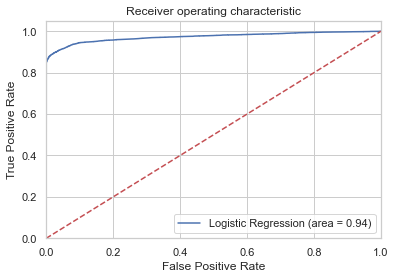

In [365]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()